In [2]:
#import required modules
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
#Generate data for model
np.random.seed(1)
def generate_data(std=1.0):
    x=np.random.uniform(0,10, 100)
    x=np.sort(x)
    y=2*x**2+3*x
    y+=np.random.normal(0, std, 100)
    x=x.reshape(100, 1)
    return x,y
x,y=generate_data()
poly=PolynomialFeatures(degree=2, include_bias=False)
x_poly=poly.fit_transform(x)

In [4]:
#Train the two models
alphas=np.linspace(0.1, 100, 1000)
ridge_model=RidgeCV(alphas=alphas)
lasso_model=LassoCV(alphas=alphas)
ridge_model.fit(x_poly, y)
lasso_model.fit(x_poly,y)

LassoCV(alphas=array([  0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,   0.9,
         1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,   1.8,
         1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,   2.7,
         2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,   3.6,
         3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,   4.5,
         4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,   5.4,
         5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,   6.3,
         6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,   7.2,
         7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,   8.1,
         8.2,   8.3,   8.4,...
        92.8,  92.9,  93. ,  93.1,  93.2,  93.3,  93.4,  93.5,  93.6,
        93.7,  93.8,  93.9,  94. ,  94.1,  94.2,  94.3,  94.4,  94.5,
        94.6,  94.7,  94.8,  94.9,  95. ,  95.1,  95.2,  95.3,  95.4,
        95.5,  95.6,  95.7,  95.8,  95.9,  96. ,  96.1,  96.2,  96.3,
        96.4,  96.5,  96.6,  96.7,  96.8,  96.9,  97. ,  97.1,  97.2,
        97.3,  97.4,  97.5,  97.6,  97.7,  97.8,  97.9,  98. ,  98.1,
        98.2,  98.3,  98.4,  98.5,  98.6,  98.7,  98.8,  98.9,  99. ,
        99.1,  99.2,  99.3,  99.4,  99.5,  99.6,  99.7,  99.8,  99.9,
       100. ]))

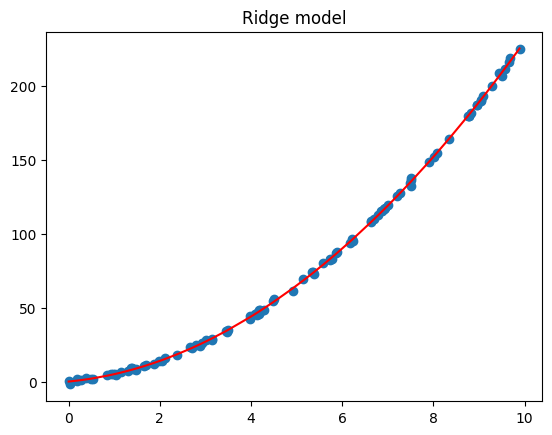

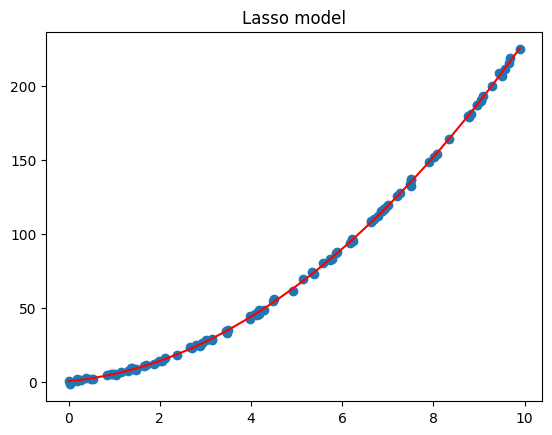

In [6]:
#Plotting the models
plt.title("Ridge model")
plt.scatter(x,y)
plt.plot(x, ridge_model.predict(x_poly), color="red")
plt.show()
plt.title("Lasso model")
plt.scatter(x,y)
plt.plot(x, lasso_model.predict(x_poly), color="red")
plt.show()

In [ ]:
#The models perform equally as well this is likely due to the fact that since our sample size is significantly 
#greater than the number of features so the cross validation will pick a value of alpha very close to 0. 
#This will make the regularization negligible and thus have minimal effect on the model.

In [ ]:
#Questions

#Regularization affects my models coefficients by lowering them as much as it can while also maintaining a low 
#error by finding parameters that balance the tradeoff.

#If you chose a very high value for alpha then the coefficients of the model would be close to 0 and the line 
#plotted would be approximately constant.